In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Need to figure out how modify colors on this example for board

# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-10.php
# board_grid = np.zeros((8,8,3),dtype=int)
# board_grid[1::2,::2] = 0
# board_grid[::2,1::2] = 0
# print(board_grid)

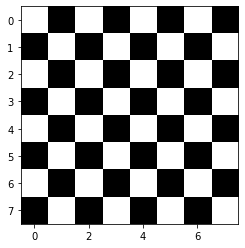

In [3]:
class Board:
# RGB values for colors .000 - 1.00
    red = (1,.2,0)
    blue = (0,1,1)

# Initializes the grid with dimensions horizontally (row) and vertixally (col)
    def __init__(self):
# np.ones() turns all of the values of each block to ones making them white or 111
        self.grid = np.ones((8,8,3))
# np.ndindex iderates through and nested array or matrix of n demensions
        for coords in np.ndindex(8,8):
# Creates variable names for the specific index values in the grid
            row = coords[0]
            col = coords[1]
# If that rows index value is not the same (odd or even) the change "np.ones" Numphy function we used above and change the color to the opposite of making the tiles black or 000. 
            if row % 2 != col % 2:
                self.grid[row, col] = (0,0,0)

    def __repr__(self):
        return "8x8 chess board"
# Sets the RGB valus for the colors to the block at what ever row/col intersection
    def add_red(self,row,col):
        self.grid[row][col] = self.red

    def add_blue(self, row, col):
        self.grid[row][col] = self.blue
# Renders the visual board using matplotlib method called imshow() 
    def render(self):
        plt.imshow(self.grid)

# Driver Code
board = Board()
board.render()

In [4]:

    def under_attack(self):
        red_coords = None
        blue_coords = None

# This will go through the entire grid row by row
        for i,row in enumerate(self.grid):
# This will go through each column of the current row from the for loop above
            for j,col in enumerate(row):
# This uses the "array_equal" functuion from the linrary Numphy to determine if the things in an array or list are equal == 
                if np.array_equal(col,self.blue):
                    blue_coords = (i,j)
# This does the same but for the oppisite color / player
                if np.array_equal(col,self.red):
                    red_coords = (i,j)
# If we missing coordinates for either piece
        if not blue_coords or not red_coords:
            return False

# Checking rows to see if they are on the same horizontal row 
        if blue_coords[0] == red_coords[0]:
            return True
# Checking columns to determine if they are on the same verticle column
        if blue_coords[1] == red_coords[1]:
            return True
# returns True if the equal amount of space persent both horizontally and verticallly
        dy = abs(blue_coords[0] - red_coords[0])
        dx = abs(blue_coords[1] - red_coords[1])
        return dx == dy

# Allows for this function to be adopted by the class above as a method.
Board.under_attack = under_attack

**** UNDER ATTACK ****


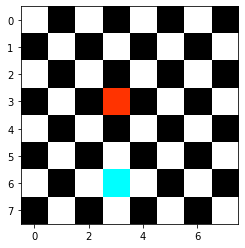

In [5]:
# test same row
board = Board()
board.add_red(3,3)
board.add_blue(6,3)
board.render()
assert board.under_attack()
print('**** UNDER ATTACK ****')

**** UNDER ATTACK ****


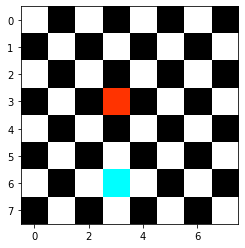

In [6]:
# test same column
board = Board()
board.add_red(3,3)
board.add_blue(6,3)
board.render()
assert board.under_attack()
print('**** UNDER ATTACK ****')

**** UNDER ATTACK ****


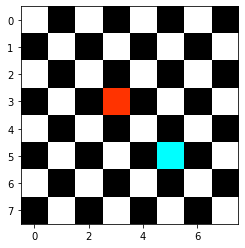

In [7]:
# test diagonal
board = Board()
board.add_red(3,3)
board.add_blue(5,5)
board.render()
assert board.under_attack()
print('**** UNDER ATTACK ****')

**** UNDER ATTACK ****


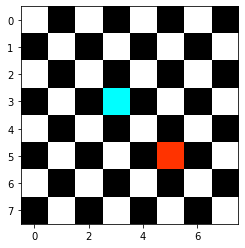

In [8]:
# test flipped diagonal
board = Board()
board.add_red(5,5)
board.add_blue(3,3)
board.render()
assert board.under_attack()
print('**** UNDER ATTACK ****')

**** UNDER ATTACK ****


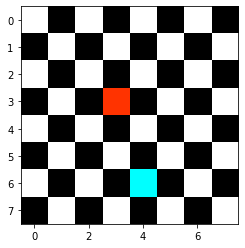

In [9]:
# test NOT under attack
board = Board()
board.add_red(3,3)
board.add_blue(6,4)
board.render()
assert not board.under_attack()
print('**** UNDER ATTACK ****')